In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# 0. Dataset can be found on:
https://www.kaggle.com/rahuldogra/top5000youtubechannels

In [4]:
url = 'https://raw.githubusercontent.com/futagoya/3-data-analysis-top-youtube-channel/main/top-5000-youtube-channels.csv'
data = pd.read_csv(url)

# 1. Show top and last rows

In [5]:
data.head(5)

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
0,1st,A++,Zee TV,82757,18752951,20869786591
1,2nd,A++,T-Series,12661,61196302,47548839843
2,3rd,A++,Cocomelon - Nursery Rhymes,373,19238251,9793305082
3,4th,A++,SET India,27323,31180559,22675948293
4,5th,A++,WWE,36756,32852346,26273668433


In [6]:
data.tail(5)

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
4995,"4,996th",B+,Uras Benlioğlu,706,2072942,441202795
4996,"4,997th",B+,HI-TECH MUSIC LTD,797,1055091,377331722
4997,"4,998th",B+,Mastersaint,110,3265735,311758426
4998,"4,999th",B+,Bruce McIntosh,3475,32990,14563764
4999,"5,000th",B+,SehatAQUA,254,21172,73312511


# 2. Find the statistics of the dataset

In [7]:
pd.options.display.float_format='={:.2f}'.format

In [8]:
data.describe(include='all')

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
count,5000,5000,5000,5000,5000,=5000.00
unique,5000,6,4993,2286,4612,NaN
top,1st,B+,Thơ Nguyễn,26,--,NaN
freq,1,2956,2,17,387,NaN
mean,NaN,NaN,NaN,NaN,NaN,=1071449400.15
std,NaN,NaN,NaN,NaN,NaN,=2003843972.12
min,NaN,NaN,NaN,NaN,NaN,=75.00
25%,NaN,NaN,NaN,NaN,NaN,=186232945.75
50%,NaN,NaN,NaN,NaN,NaN,=482054780.00
75%,NaN,NaN,NaN,NaN,NaN,=1124367826.75


# 3. Clean the dataset

In [9]:
data.head(20)

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
0,1st,A++,Zee TV,82757,18752951,20869786591
1,2nd,A++,T-Series,12661,61196302,47548839843
2,3rd,A++,Cocomelon - Nursery Rhymes,373,19238251,9793305082
3,4th,A++,SET India,27323,31180559,22675948293
4,5th,A++,WWE,36756,32852346,26273668433
5,6th,A++,Movieclips,30243,17149705,16618094724
6,7th,A++,netd müzik,8500,11373567,23898730764
7,8th,A++,ABS-CBN Entertainment,100147,12149206,17202609850
8,9th,A++,Ryan ToysReview,1140,16082927,24518098041
9,10th,A++,Zee Marathi,74607,2841811,2591830307


## Replace -- with NaN

In [10]:
data=data.replace('--',np.nan,regex=True)

In [11]:
data[data['Channel name']=='Vlad and Nikita']

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
17,18th,A+,Vlad and Nikita,53,NaN,1428274554


# 4. Check and Drop the missing values

In [12]:
data.isnull().sum()

Rank               0
Grade              0
Channel name       0
Video Uploads      6
Subscribers      387
Video views        0
dtype: int64

###  How many percent the missing values?

In [13]:
per_missing=data.isnull().sum() / len(data) * 100
per_missing

Rank            =0.00
Grade           =0.00
Channel name    =0.00
Video Uploads   =0.12
Subscribers     =7.74
Video views     =0.00
dtype: float64

<Axes: >

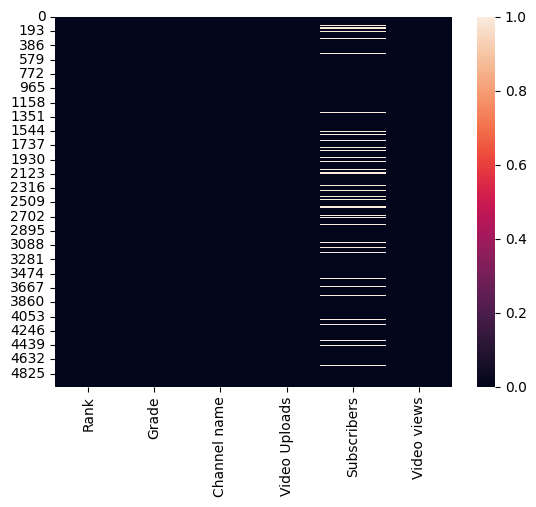

In [14]:
sns.heatmap(data.isnull())

### Drop the rows which contain missing values

<Axes: >

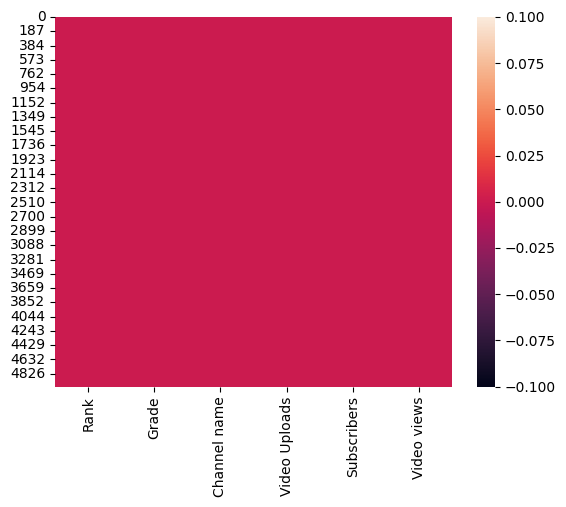

In [15]:
data.dropna(axis=0,inplace=True)
sns.heatmap(data.isnull())

# 5. Clean the dataset (2)

In [16]:
data.head()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
0,1st,A++,Zee TV,82757,18752951,20869786591
1,2nd,A++,T-Series,12661,61196302,47548839843
2,3rd,A++,Cocomelon - Nursery Rhymes,373,19238251,9793305082
3,4th,A++,SET India,27323,31180559,22675948293
4,5th,A++,WWE,36756,32852346,26273668433


## Convert rank (object) into number (int)

### Replace st from 1st, etc 

In [17]:
data['Rank']=data['Rank'].str[:-2]

In [18]:
data.head()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
0,1,A++,Zee TV,82757,18752951,20869786591
1,2,A++,T-Series,12661,61196302,47548839843
2,3,A++,Cocomelon - Nursery Rhymes,373,19238251,9793305082
3,4,A++,SET India,27323,31180559,22675948293
4,5,A++,WWE,36756,32852346,26273668433


In [19]:
data.tail()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
4995,"4,996",B+,Uras Benlioğlu,706,2072942,441202795
4996,"4,997",B+,HI-TECH MUSIC LTD,797,1055091,377331722
4997,"4,998",B+,Mastersaint,110,3265735,311758426
4998,"4,999",B+,Bruce McIntosh,3475,32990,14563764
4999,"5,000",B+,SehatAQUA,254,21172,73312511


### Replace ',' from thousand numbers

In [20]:
data['Rank']=data['Rank'].str.replace(',','').astype('int')
data.tail()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
4995,4996,B+,Uras Benlioğlu,706,2072942,441202795
4996,4997,B+,HI-TECH MUSIC LTD,797,1055091,377331722
4997,4998,B+,Mastersaint,110,3265735,311758426
4998,4999,B+,Bruce McIntosh,3475,32990,14563764
4999,5000,B+,SehatAQUA,254,21172,73312511


In [21]:
data.dtypes

Rank              int32
Grade            object
Channel name     object
Video Uploads    object
Subscribers      object
Video views       int64
dtype: object

In [22]:
data['Video Uploads']=data['Video Uploads'].astype('int')
data['Subscribers']=data['Subscribers'].astype('int')
data.dtypes

Rank              int32
Grade            object
Channel name     object
Video Uploads     int32
Subscribers       int32
Video views       int64
dtype: object

# 6. Clean the dataset (3)

## Convert Grade column into numbers (int)

In [23]:
data.head()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
0,1,A++,Zee TV,82757,18752951,20869786591
1,2,A++,T-Series,12661,61196302,47548839843
2,3,A++,Cocomelon - Nursery Rhymes,373,19238251,9793305082
3,4,A++,SET India,27323,31180559,22675948293
4,5,A++,WWE,36756,32852346,26273668433


In [24]:
data['Grade'].unique()

array(['A++ ', 'A+ ', 'A ', 'A- ', 'B+ '], dtype=object)

In [25]:
data['Grade']=data['Grade'].map({'A++ ':5,'A+ ':4,'A ':3,'A- ':2,'B+ ':1}).astype('int')
data.dtypes

Rank              int32
Grade             int32
Channel name     object
Video Uploads     int32
Subscribers       int32
Video views       int64
dtype: object

# 7. Add 'average views' column

In [26]:
data['Video views'].astype('int32')

0       -605049889
1        304199587
2       1203370490
3       1201111813
4        503864657
           ...    
4995     441202795
4996     377331722
4997     311758426
4998      14563764
4999      73312511
Name: Video views, Length: 4610, dtype: int32

In [27]:
data['Average views']=data['Video views']//data['Video Uploads']

In [28]:
data.sort_values(by='Average views',ascending=False).head(5)

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views,Average views
628,629,3,cocoz toon,1,2162992,333012122,333012122
314,315,3,icanrockyourworld,8,3891968,2420286079,302535759
613,614,3,AdeleVEVO,31,16270830,7414111263,239164879
389,390,3,Bad Bunny,11,12685253,2612504875,237500443
1120,1121,2,Danny Ocean,8,2861917,1690503137,211312892


In [29]:
top_5_avg_views=data.sort_values(by='Average views',ascending=False).head(5)

# 8.Which grade has the highest average views?

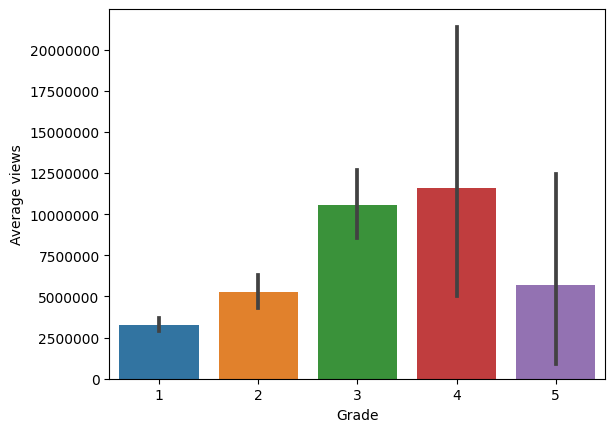

In [30]:
sns.barplot(x='Grade',y='Average views',data=data)
plt.ticklabel_format(style='plain', axis='y')

# 9. Show the top 5 Channel with highest Video views

In [31]:
top_5_views=data.sort_values(by='Video views',ascending=False).head(5)

In [32]:
import warnings
warnings.filterwarnings('ignore')

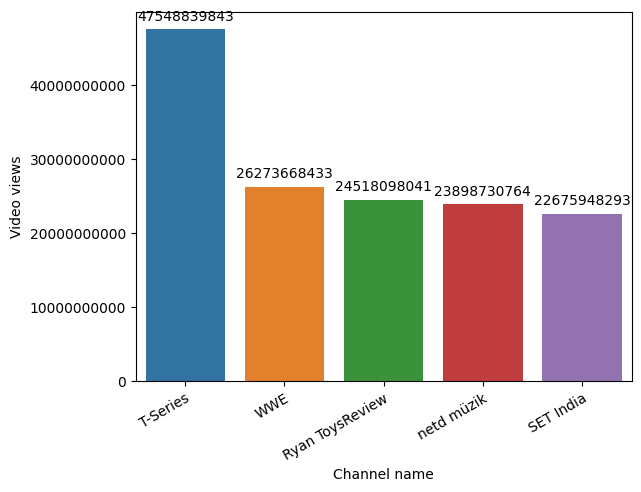

In [33]:
fig, ax = plt.subplots()
x=data['Channel name']
ax.set_xticklabels(x, rotation=30, ha="right", rotation_mode="anchor")
sns.barplot(x='Channel name',y='Video views',data=top_5_views)
plt.ticklabel_format(style='plain', axis='y')
# Add the exact numbers above the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, 9), textcoords = 'offset points')

# 10. Show the top 5 Channel with highest Subscribers

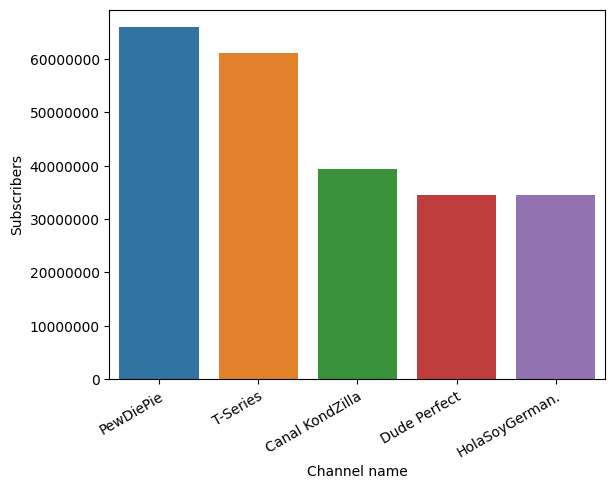

In [34]:
top_5_subs=data.sort_values(by='Subscribers',ascending=False).head(5)
fig, ax = plt.subplots()
x=data['Channel name']
ax.set_xticklabels(x, rotation=30, ha="right", rotation_mode="anchor")
sns.barplot(x='Channel name',y='Subscribers',data=top_5_subs)
plt.ticklabel_format(style='plain', axis='y')


In [35]:
data.corr().style.background_gradient(cmap='coolwarm')

,Rank,Grade,Video Uploads,Subscribers,Video views,Average views
Rank,1.000000,-0.865083,-0.073180,-0.383329,-0.402873,-0.153670
Grade,-0.865083,1.000000,0.088773,0.429213,0.477423,0.155231
Video Uploads,-0.073180,0.088773,1.000000,0.011362,0.087830,-0.064408
Subscribers,-0.383329,0.429213,0.011362,1.000000,0.791241,0.289386
Video views,-0.402873,0.477423,0.087830,0.791241,1.000000,0.294422
Average views,-0.153670,0.155231,-0.064408,0.289386,0.294422,1.000000
